In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("01-Ad.csv")

# ======Preprocessing=======

In [5]:
x = df.iloc[:,3:5].values
y = df.iloc[:,-1].values #sotune akhar ke hamoon targete ma hast


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# =====Building model======

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(x_test)

In [19]:
print(y_pred)

[0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0]


In [21]:
print(model.coef_)
print(model.intercept_)

[[2.16368161 1.08087909]]
[-1.0759445]


In [23]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.84


In [25]:
#hala confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  2]
 [14 22]]


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3055555555555556

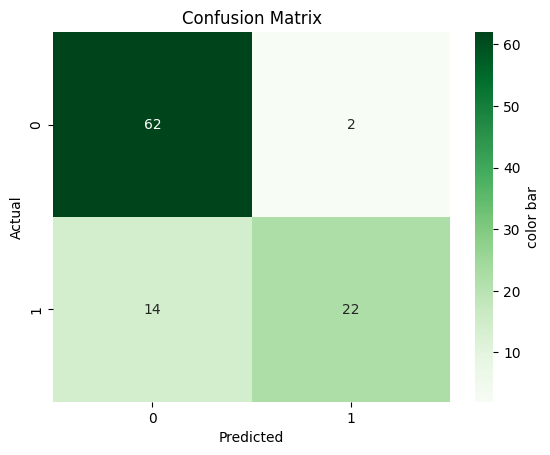

In [16]:
labels_order = [0,1]
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"label":"color bar","orientation":"vertical"},
            xticklabels=labels_order,yticklabels=labels_order
            )
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

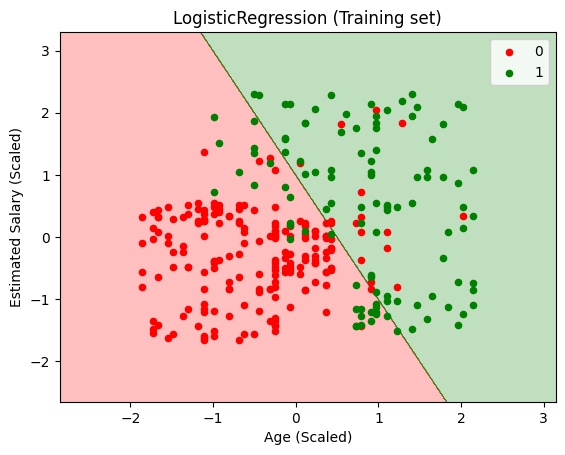

In [17]:
model_name="LogisticRegression"
is_scaled=True

# --- train
from matplotlib.colors import ListedColormap
cmap=ListedColormap(["red","green"])

x_set,y_set=x_train,y_train

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=cmap)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], s=20, color=cmap(i), label=j)
plt.title(f"{model_name} (Training set)")
plt.xlabel("Age (Scaled)" if is_scaled else "Age")
plt.ylabel("Estimated Salary (Scaled)" if is_scaled else "Estimated Salary")
plt.legend()
plt.show()

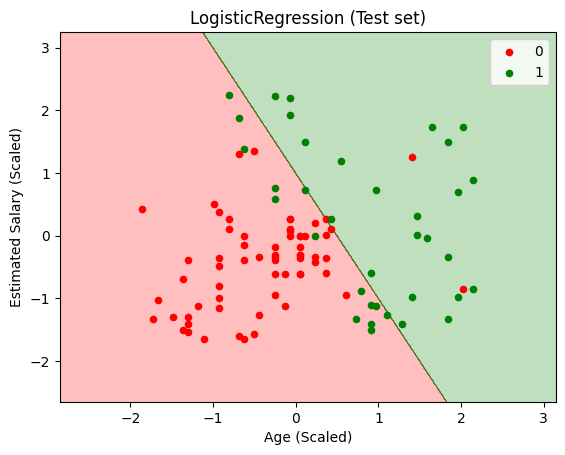

In [18]:
cmap=ListedColormap(["red","green"])

x_set,y_set=x_test,y_test

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=cmap)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], s=20, color=cmap(i), label=j)
plt.title(f"{model_name} (Test set)")
plt.xlabel("Age (Scaled)" if is_scaled else "Age")
plt.ylabel("Estimated Salary (Scaled)" if is_scaled else "Estimated Salary")
plt.legend()
plt.show()
